In [4]:
import os, shutil, pathlib

original_dir = pathlib.Path("cats-dogs-images")
new_base_dir = pathlib.Path("cats_vs_dogs_subset")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        directory = new_base_dir / subset_name / category
        os.makedirs(directory)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(
                src = original_dir / category / fname,
                dst = directory / fname
            )
        


In [52]:
# make_subset("train", start_index=0, end_index=1000)  
# make_subset("validation", start_index=1000, end_index=1500)   
# make_subset("test", start_index=2500, end_index=3500)

The image width is: 300 pixels
The image height is: 281 pixels
The resize image width is: 180 pixels
The resize image height is: 180 pixels
[[[ 37  42  38]
  [ 38  42  41]
  [ 39  43  44]
  ...
  [191 190 162]
  [203 201 164]
  [203 201 162]]

 [[ 40  45  41]
  [ 40  44  43]
  [ 41  45  46]
  ...
  [192 191 164]
  [204 202 167]
  [200 196 158]]

 [[ 41  46  42]
  [ 39  43  42]
  [ 38  42  43]
  ...
  [190 187 163]
  [201 197 166]
  [202 197 162]]

 ...

 [[ 28  26  27]
  [ 24  22  23]
  [ 20  18  19]
  ...
  [ 51  37  31]
  [ 43  31  25]
  [ 42  31  25]]

 [[ 32  30  31]
  [ 26  24  25]
  [ 22  20  21]
  ...
  [ 38  24  17]
  [ 39  27  19]
  [ 51  41  32]]

 [[ 31  29  30]
  [ 26  24  25]
  [ 23  21  22]
  ...
  [ 45  31  23]
  [ 50  37  29]
  [ 43  33  23]]]
[[[ 37.  42.  38.]
  [ 38.  42.  41.]
  [ 39.  43.  44.]
  ...
  [191. 190. 162.]
  [203. 201. 164.]
  [203. 201. 162.]]

 [[ 40.  45.  41.]
  [ 40.  44.  43.]
  [ 41.  45.  46.]
  ...
  [192. 191. 164.]
  [204. 202. 167.]
  [200.

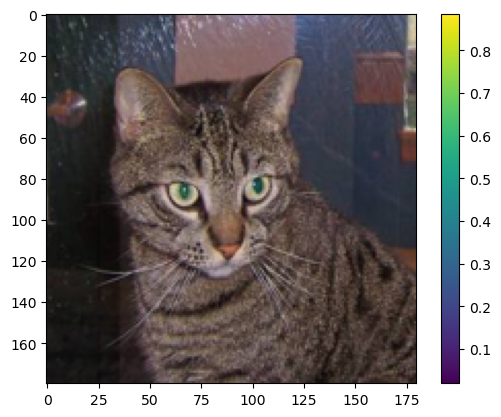

In [24]:
import keras
from keras import layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image = Image.open("cats-dogs-images/cat/1.jpg").convert('RGB')

width, height = image.size
print(f"The image width is: {width} pixels")
print(f"The image height is: {height} pixels")

image = image.resize((180, 180))

width, height = image.size
print(f"The resize image width is: {width} pixels")
print(f"The resize image height is: {height} pixels")

image = np.array(image)
print(image)
print("================================================")
image = image.astype("float32")
print(image)
print("================================================")
image = image / 255.0
print(image)


plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()


In [17]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs) # Rescale inputs to the [0, 1] range by dividing them by 255
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [18]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#### Data preprocessing
##### Read the picture files.
##### Decode the JPEG content to RGB grids of pixels.
##### Convert these into floating-point tensors.
##### Resize them to a shared size (we’ll use 180  180)
##### Pack them into batches (we’ll use batches of 32 images)
##### Keras features the utility function `image_dataset_from_directory()`, which lets you quickly set up a data pipeline that can automatically turn image files on disk into batches of preprocessed tensors.

In [26]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


##### the output of one of these Dataset objects: it yields batches of 180  180 RGB images (shape (32, 180, 180, 3)) and integer labels (shape (32,)). There are 32 samples in each batch (the batch size)

In [34]:
for data, labels in train_dataset:
    print("data batch shape:", data.shape)
    print("labels batch shape:", labels.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

#### The model.fit() method uses the training data to adjust the model's parameters (learn). The validation data is used purely to evaluate the model's performance on unseen data at the end of each epoch, helping you understand how well your model is generalizing and to make decisions about the training process. 

In [38]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 620ms/step - accuracy: 0.4961 - loss: 0.6930 - val_accuracy: 0.5080 - val_loss: 0.6926
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 572ms/step - accuracy: 0.5413 - loss: 0.6940 - val_accuracy: 0.6350 - val_loss: 0.6764
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 570ms/step - accuracy: 0.6136 - loss: 0.6839 - val_accuracy: 0.5850 - val_loss: 0.6660
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 570ms/step - accuracy: 0.6254 - loss: 0.6442 - val_accuracy: 0.5360 - val_loss: 0.9320
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 592ms/step - accuracy: 0.6703 - loss: 0.6276 - val_accuracy: 0.5910 - val_loss: 0.6646
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 573ms/step - accuracy: 0.6968 - loss: 0.5882 - val_accuracy: 0.6700 - val_loss: 0.5958
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 569ms/step - accuracy: 0.7341 - loss: 0.5547 - val_accuracy: 0.6790 - val_loss: 0.6019
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 566ms/step - accuracy: 0.7200 - loss: 0.5395 - val_accu

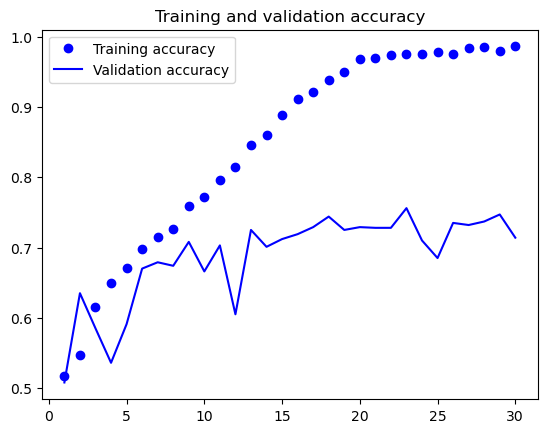

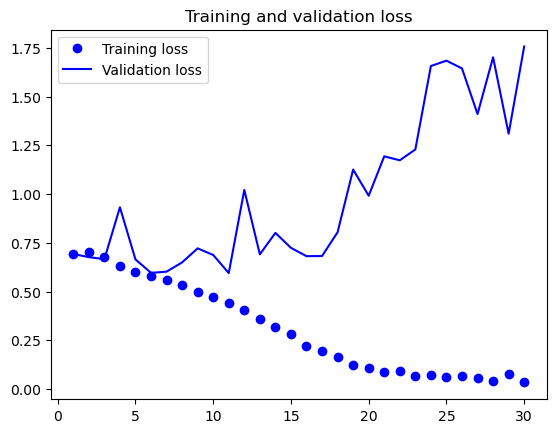

In [40]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

##### These plots are characteristic of overfitting. 
##### The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy peaks at 75%. 
##### The training loss keeps decreasing linearly as training proceeds whereas the validation loss reaches its minimum after only ten epochs and then stalls.

In [54]:
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

test_model = keras.models.load_model("convnet_from_scratch.keras")
try:
    test_loss, test_acc = test_model.evaluate(test_dataset)
    print(f"Test accuracy: {test_acc:.3f}")
    print(f"Test loss: {test_loss:.3f}")
except Exception as e:
    print(e)
    pass

Found 2000 files belonging to 2 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.7265 - loss: 0.5995
Test accuracy: 0.736
Test loss: 0.593


##### We get a test accuracy of 72.6%.
##### With a limited training dataset of 2,000 samples, overfitting is the primary concern. To combat this, alongside familiar techniques like dropout and L2 regularization, data augmentation, a widely used method in computer vision for deep learning models, will be employed.